In [2]:
import matplotlib.pyplot as plt
from numpy import linspace, pi, array
import swarms

#### Plotting Dc vs Dmin keeping $\sigma_{tot}$ and $M_{tot}$ constant

Using eq.(4) from Kennedy & Wyatt 2011,
\begin{equation}
    \bigg(\frac{M_{tot}}{M_{moon}}\bigg) = 2.2 \times 10^{-8}\bigg(\frac{\rho}{kgm^{-3}}\bigg) \bigg(\frac{\sigma_{tot}}{R_{jup}^2}\bigg) \bigg(\frac{D_c}{m}\bigg)^{0.9} \bigg(\frac{D_{min}}{m}\bigg)^{0.7} 
\end{equation}

The constrast ratio (CR) is given as,
\begin{equation}
    CR = \frac{F_{swarm}}{F_*^{d_{pl}}} = \frac{\sigma_{tot}gQ}{a_{pl}^2 \pi} = \frac{\sigma_{0}gQ}{a_{pl}^2 \pi} G(t)
\end{equation}

Using the same eq.(4) to get the CR with respect to the swarm mass,
\begin{equation}
    CR = 5 \times 10^8 \frac{ \bigg(\frac{M_{tot}}{M_{moon}}\bigg) g Q }{ \bigg(\frac{D_c}{m}\bigg)^{0.9} \bigg(\frac{D_{min}}{m}\bigg)^{0.7} \bigg(\frac{a_{pl}}{R_{jup}}\bigg)^2 \pi \bigg(\frac{\rho}{kgm^{-3}}\bigg) }
\end{equation}

$D_{min}$ is given by eq.(9) from Kennedy & Wyatt 2011. If we assume $L_* \propto M_*^4$,
\begin{equation}
    \bigg(\frac{D_{min}}{\mu m}\bigg) = 2.07 \times 10^4 \bigg(\frac{M_*}{M_{\odot}}\bigg)^{10/3} \bigg(\frac{\rho}{kgm^{-3}}\bigg)^{-1} \bigg(\frac{\eta}{0.5}\bigg)^{1/2} \bigg(\frac{M_{pl}}{M_{jup}}\bigg)^{-1/3}
\end{equation}

We can write CR as,
\begin{equation}
    CR = 141.12 \frac{ \bigg(\frac{M_{pl}}{M_{jup}}\bigg)^{7/30} \bigg(\frac{M_{tot}}{M_{moon}}\bigg) \bigg(\frac{g}{0.32}\bigg) \bigg(\frac{Q}{0.1}\bigg) }{ \bigg( \frac{D_c}{m} \bigg)^{0.9} \bigg(\frac{M_*}{M_{\odot}}\bigg)^{7/3} \bigg(\frac{\eta}{0.5}\bigg)^{7/20} \bigg(\frac{a_{pl}}{AU}\bigg)^2 \bigg(\frac{\rho}{kgm^{-3}}\bigg)^{3/10} }
\end{equation}

In [21]:
Mmoon = 7.34767309e22
Rjup = 7.1492e7
AU = 1.496e11

# Fix different M_tot
Mtot100 = 100
Mtot10 = 10
Mtot1 = 1

# Fix different sigma_tot
sigma_tot6 = 1e-6 * AU**2 / Rjup**2
sigma_tot7 = 1e-7 * AU**2 / Rjup**2
sigma_tot8 = 1e-8 * AU**2 / Rjup**2

# Fix different Dmin
Dmin0165 = 1.65 * 1e-6
Dmin0500 = 5.00 * 1e-6
Dmin1200 = 12.00 * 1e-6
Dmin2300 = 23.00 * 1e-6

rho = 1500
Dc = linspace(1e4, 1e7, 500)
Dmin = linspace(1.65 * 1e-6, 23 * 1e-6, 500)

In [4]:
# sig in Rjup^2
# M in Mmoon
# rest in SI
def dmin_to_dc(M, rho, sig, dmin):
    return (2e-9 * rho * sig * dmin**0.7 / M)**(-0.9)

def dc_to_sig(M, rho, dc, dmin):
    return M / (2e-9 * rho * dc**0.9 * dmin**0.7)

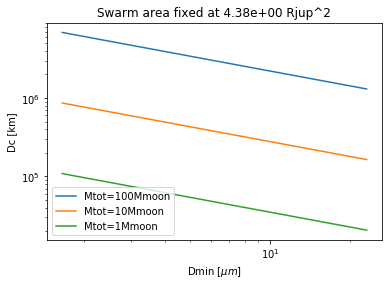

In [5]:
Dc100 = []
Dc10 = []
Dc1 = []
for i in range(len(Dmin)):
    Dc100.append(dmin_to_dc(Mtot100, rho, sigma_tot6, Dmin[i]) / 1000)
    Dc10.append(dmin_to_dc(Mtot10, rho, sigma_tot6, Dmin[i]) / 1000)
    Dc1.append(dmin_to_dc(Mtot1, rho, sigma_tot6, Dmin[i]) / 1000)

plt.figure(1)
plt.loglog(Dmin / 1e-6, Dc100, label="Mtot=100Mmoon")
plt.loglog(Dmin / 1e-6, Dc10, label="Mtot=10Mmoon")
plt.loglog(Dmin / 1e-6, Dc1, label="Mtot=1Mmoon")
plt.xlabel(r"Dmin $[\mu m]$")
plt.ylabel("Dc [km]")
plt.title("Swarm area fixed at {0:.2e}".format(sigma_tot6)+" Rjup^2")
plt.legend()
plt.show()

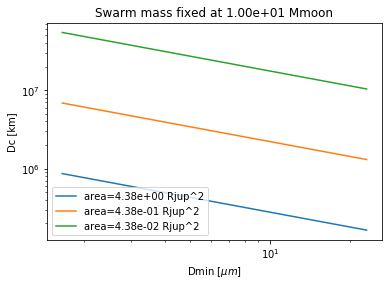

In [6]:
Dc6 = []
Dc7 = []
Dc8 = []
for i in range(len(Dmin)):
    Dc6.append(dmin_to_dc(Mtot10, rho, sigma_tot6, Dmin[i]) / 1000)
    Dc7.append(dmin_to_dc(Mtot10, rho, sigma_tot7, Dmin[i]) / 1000)
    Dc8.append(dmin_to_dc(Mtot10, rho, sigma_tot8, Dmin[i]) / 1000)

plt.figure(1)
plt.loglog(Dmin / 1e-6, Dc6, label="area={0:.2e}".format(sigma_tot6)+" Rjup^2")
plt.loglog(Dmin / 1e-6, Dc7, label="area={0:.2e}".format(sigma_tot7)+" Rjup^2")
plt.loglog(Dmin / 1e-6, Dc8, label="area={0:.2e}".format(sigma_tot8)+" Rjup^2")
plt.xlabel(r"Dmin $[\mu m]$")
plt.ylabel("Dc [km]")
plt.title("Swarm mass fixed at {0:.2e}".format(Mtot10)+" Mmoon")
plt.legend()
plt.show()

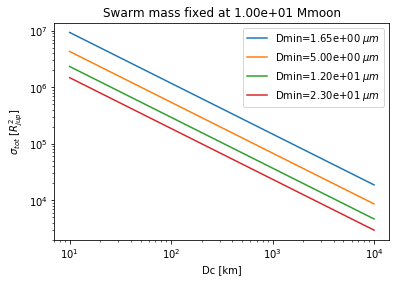

In [7]:
A0165 = []
A0500 = []
A1200 = []
A2300 = []

for i in range(len(Dc)):
    A0165.append(dc_to_sig(Mtot10, rho, Dc[i], Dmin0165))
    A0500.append(dc_to_sig(Mtot10, rho, Dc[i], Dmin0500))
    A1200.append(dc_to_sig(Mtot10, rho, Dc[i], Dmin1200))
    A2300.append(dc_to_sig(Mtot10, rho, Dc[i], Dmin2300))
    

plt.figure(1)
plt.loglog(Dc/1000, A0165, label="Dmin={0:.2e}".format(Dmin0165/1e-6)+r" $\mu m$")
plt.loglog(Dc/1000, A0500, label="Dmin={0:.2e}".format(Dmin0500/1e-6)+r" $\mu m$")
plt.loglog(Dc/1000, A1200, label="Dmin={0:.2e}".format(Dmin1200/1e-6)+r" $\mu m$")
plt.loglog(Dc/1000, A2300, label="Dmin={0:.2e}".format(Dmin2300/1e-6)+r" $\mu m$")
plt.xlabel("Dc [km]")
plt.ylabel(r"$\sigma_{tot}$ [$R_{jup}^2$]")
plt.title("Swarm mass fixed at {0:.2e}".format(Mtot10)+" Mmoon")
plt.legend()
plt.show()

#### $CR$ equation relationship

In [8]:
Mjup = 1.898e27
Msun = 2e30

Q = 0.08
g = 0.32
eta = 0.4
CR = 1e-6
Mpl = 1 # 1 Jup
dpl = 30 # pc

Mstar = linspace(7.5/100., 60/100, 500)

In [9]:
def Smass_to_dc(CR, M_pl, M_tot, Smass, dpl):
    return (( 1.71e-5 * M_pl**(7/30) * (M_tot/10) * (g/.32) * (Q/.1) / ( CR * (Smass/0.075)**(7/3) * (eta/.4)**(7/20) * (dpl/30)**2 * (rho/1500)**(3/10) ) )**(0.9))*150

In [10]:
def cr_to_sig(CR, dpl, g, Q):
    return CR / (1.7e-8 * (g/0.32) * (Q/0.1) * dpl**2)

In [11]:
def Smass_to_dc2(Smass, sig, M_tot, M_pl, rhocc):
    part1 = 20 * Smass**(10./3.) * M_pl**(-1./3.) * rhocc**(-1)
    return (sig / (7.4e7 * M_tot * rhocc**(-1.) * part1**(-0.7)))**(-0.9)*100

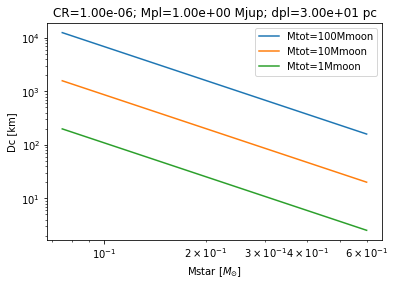

In [12]:
Dc100 = []
Dc10 = []
Dc1 = []
for i in range(len(Mstar)):
    Dc100.append(Smass_to_dc(CR, Mpl, Mtot100, Mstar[i], dpl))
    Dc10.append(Smass_to_dc(CR, Mpl, Mtot10, Mstar[i], dpl))
    Dc1.append(Smass_to_dc(CR, Mpl, Mtot1, Mstar[i], dpl))
    
plt.figure(1)
plt.loglog(Mstar, Dc100, label="Mtot=100Mmoon")
plt.loglog(Mstar, Dc10, label="Mtot=10Mmoon")
plt.loglog(Mstar, Dc1, label="Mtot=1Mmoon")
plt.xlabel(r"Mstar [$M_{\odot}$]")
plt.ylabel("Dc [km]")
plt.title("CR={0:.2e}".format(CR)+"; Mpl={0:.2e}".format(Mpl)+" Mjup;"+" dpl={0:.2e}".format(dpl)+" pc")
plt.legend()
plt.show()

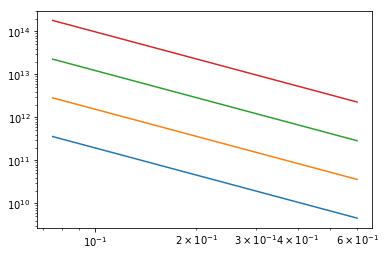

In [13]:
rhocc = rho / 1000

# Fix some CR
CR_lst = [1e-5, 1e-6, 1e-7, 1e-8]

# convert CR into area
area = []
for i in range(len(CR_lst)):
    area.append(cr_to_sig(CR_lst[i], dpl, g, Q))
    
# get Dc
Dc_lst = []
for i in range(len(area)):
    Dc_temp = []
    for j in range(len(Mstar)):
        Dc_temp.append(Smass_to_dc2(Mstar[j], area[i], Mtot10, Mpl, rhocc))
    Dc_lst.append(Dc_temp)

plt.figure(1)
for i in range(len(Dc_lst)):
    plt.loglog(Mstar, Dc_lst[i])
plt.show()


In [42]:
def Smass_to_dmin(Mstar, Mplt, rho):
    return 29 * eta**(1./2.) * Mstar**(10./3.) * Mplt**(-1./3.) / rho

In [38]:
def dmin_to_sigma0(Mtot, rho, dc, dmin):
    return 1.2e9 * Mtot * rho**(-1) * (dc/100)**(-0.9) * (dmin/10)**(-0.7)

In [22]:
def sig_to_cr(dpl, sig):
    return 1.7e-8 * (g/0.32) * (Q/0.1) * (1./dpl)**2 * (sig)

In [34]:
def sig_to_cr2(apl, sig):
    return 2e-11 * (g/0.32) * (Q/0.1) * (30./apl)**2 * (sig)

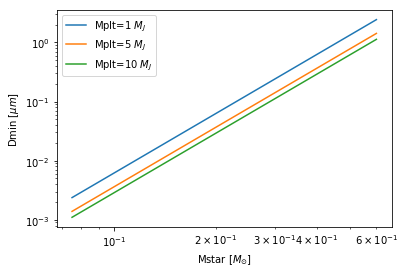

In [16]:
Mpl1 = 1
Mpl5 = 5
Mpl10 = 10
rhocc = rho / 1000

Dmin1 = []
Dmin5 = []
Dmin10 = []
for i in range(len(Mstar)):
    Dmin1.append(Smass_to_dmin(Mstar[i], Mpl1, rhocc))
    Dmin5.append(Smass_to_dmin(Mstar[i], Mpl5, rhocc))
    Dmin10.append(Smass_to_dmin(Mstar[i], Mpl10, rhocc))
    
plt.figure(1)
plt.loglog(Mstar, Dmin1, label=r"Mplt=1 $M_{J}$")
plt.loglog(Mstar, Dmin5, label=r"Mplt=5 $M_{J}$")
plt.loglog(Mstar, Dmin10, label=r"Mplt=10 $M_{J}$")
plt.xlabel(r"Mstar [$M_{\odot}$]")
plt.ylabel(r"Dmin [$\mu m$]")
plt.legend()
plt.show()

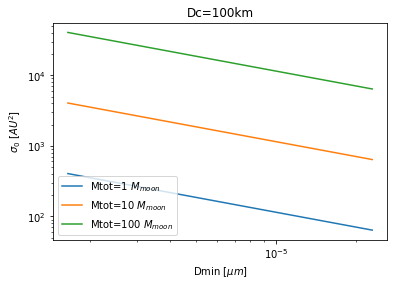

In [17]:
sig1 = []
sig10 = []
sig100 = []

for i in range(len(Dmin)):
    sig1.append(dmin_to_sigma0(Mtot1, rhocc, 100, Dmin[i] * (1./1e-6)))
    sig10.append(dmin_to_sigma0(Mtot10, rhocc, 100, Dmin[i] * (1./1e-6)))
    sig100.append(dmin_to_sigma0(Mtot100, rhocc, 100, Dmin[i] * (1./1e-6)))
    
plt.figure(1)
plt.loglog(Dmin, array(sig1) * pi * Rjup**2 / AU**2, label=r"Mtot=1 $M_{moon}$")
plt.loglog(Dmin, array(sig10) * pi * Rjup**2 / AU**2, label=r"Mtot=10 $M_{moon}$")
plt.loglog(Dmin, array(sig100) * pi * Rjup**2 / AU**2, label=r"Mtot=100 $M_{moon}$")
plt.xlabel(r"Dmin [$\mu m$]")
plt.ylabel(r"$\sigma_0$ [$AU^2$]")
plt.title("Dc=100km")
plt.legend()
plt.show()

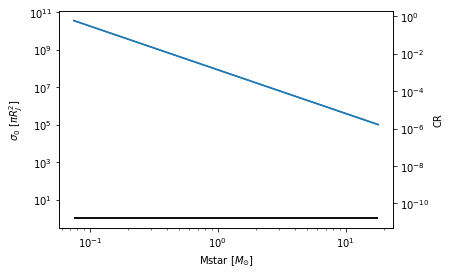

In [53]:
Mstar = linspace(7.5/100., 18., 500)
dc100 = 100
dpl = 10
apl = 30
Mearth = 5.972e24

# find Dmin from Mstar
dmin = Smass_to_dmin(Mstar, Mpl, rhocc)

# find the swarm area from dmin
sig = dmin_to_sigma0(Mtot10 * Mmoon / Mearth, rhocc, dc100, dmin)

# convert the area into contrast ratio
cr = sig_to_cr2(apl, sig)

# find jupiter cr (sig=1)
cr_j = sig_to_cr2(apl, 1)

# Fix some CR
CR_lst = [1e-5, 1e-6, 1e-7, 1e-8]

fig, ax1 = plt.subplots()

ax1.loglog(Mstar, sig)
ax1.set_ylabel(r"$\sigma_0$ [$\pi R_J^2$]")
ax1.hlines(1, Mstar[0], Mstar[-1])


ax2 = ax1.twinx()
ax2.loglog(Mstar, cr)
ax2.set_ylabel("CR")
ax2.hlines(cr_j, Mstar[0], Mstar[-1])


ax1.set_xlabel(r"Mstar [$M_{\odot}$]")
plt.show()